## ***1. We apply Simple Linear Regression Algorithm***

## Pridicting the Salary based on Experience

## ***Importing important Libraries***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sfa
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv("/content/sample_data/Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Renaming the column.
data.rename(columns={'YearsExperience':'Experience'},inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  30 non-null     float64
 1   Salary      30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.head()

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
data.describe()

,Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='Experience', ylabel='Density'>

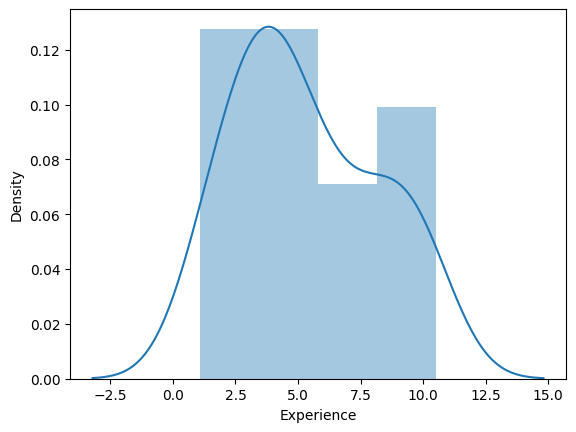

In [9]:
sns.distplot(data.iloc[:,0])

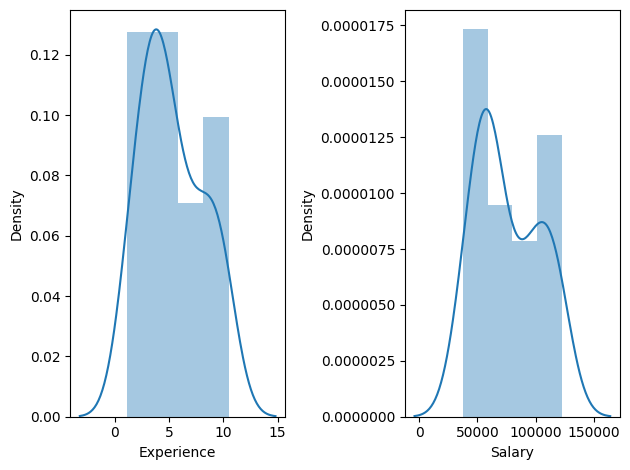

In [10]:
# Distribution plot for Experience and Salary

fig,ax=plt.subplots(1,2)
plt.ticklabel_format(style='plain')
sns.distplot(data.iloc[:,0],ax=ax[0],label='Experience')
sns.distplot(data.iloc[:,1],ax=ax[1],label='Salary')
fig.show();
plt.tight_layout()

## ***Correlation***

In [11]:
hc=data.corr()

<Axes: >

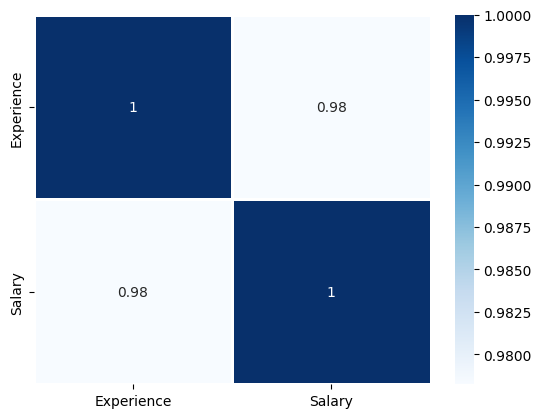

In [12]:
sns.heatmap(hc,annot=True,cmap='Blues',linewidths=1,linecolor='w')

## ***Fitting a Linear Regression Model***

In [13]:
model=sfa.ols('Salary~Experience',data=data).fit()

In [14]:
model

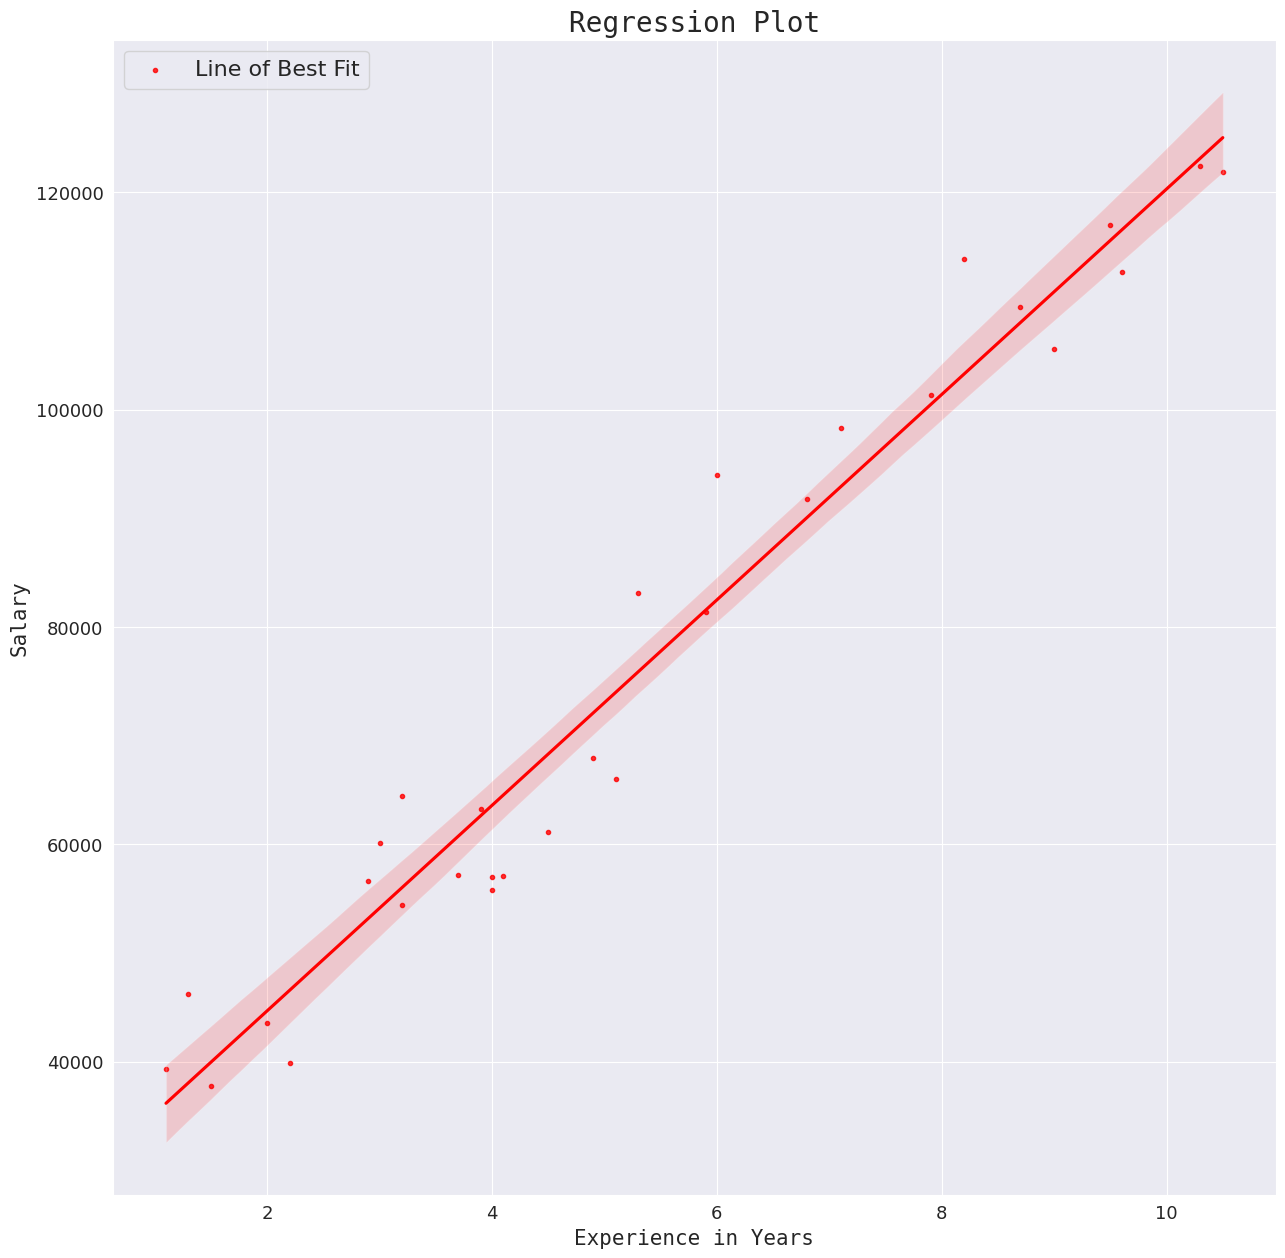

In [15]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
sns.regplot(x='Experience',y='Salary',data=data,color='red',marker='.')
plt.xlabel('Experience in Years',size=15,family='monospace')
plt.ylabel('Salary',size=15,family='monospace')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Regression Plot',size=20,family='monospace')
plt.legend(['Line of Best Fit'],loc='upper left',fontsize=16)
plt.show()

In [16]:
# t-values and p-values

print(model.tvalues,'\n',model.pvalues)

Intercept     11.346940
Experience    24.950094
dtype: float64 
 Intercept     5.511950e-12
Experience    1.143068e-20
dtype: float64


$R^2$ value

In [17]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## ***1. We apply Simple Linear Regression Algorithm to Predict the Delivery Time***

In [19]:
data=pd.read_csv("/content/sample_data/delivery_time.csv")

In [20]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [22]:
# Renaming the column
data.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'},inplace=True)

In [23]:
data.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


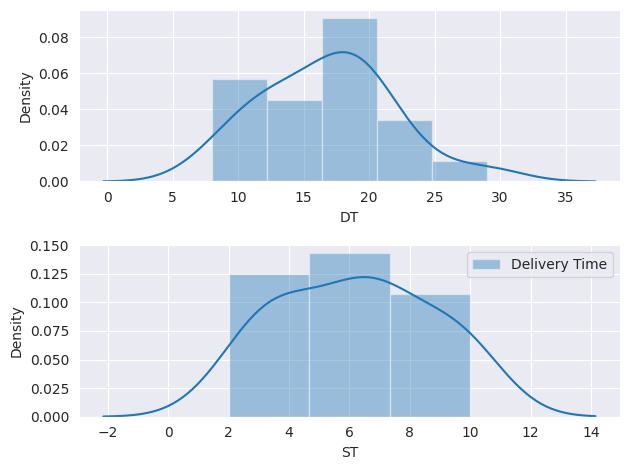

In [24]:
# Plotting the Distribution Plots
fig,ax=plt.subplots(2,1)
plt.ticklabel_format(style='plain')
sns.distplot(data.iloc[:,0],ax=ax[0],label='Sorting Time')
sns.distplot(data.iloc[:,1],ax=ax[1],label='Delivery Time')
fig.show()
plt.legend()
plt.tight_layout()

In [25]:
## *Correlation*

In [26]:
hc=data.corr()

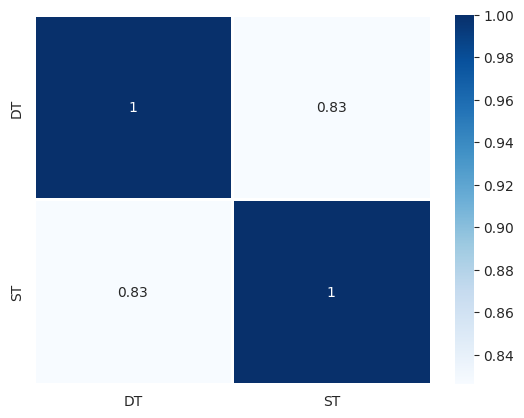

In [27]:
sns.heatmap(hc,annot=True,cmap='Blues',linewidth=1,linecolor='w');

In [28]:
## *Fitting a Linear Regression Model*

In [29]:
model=sfa.ols('DT~ST',data=data).fit()

In [30]:
model

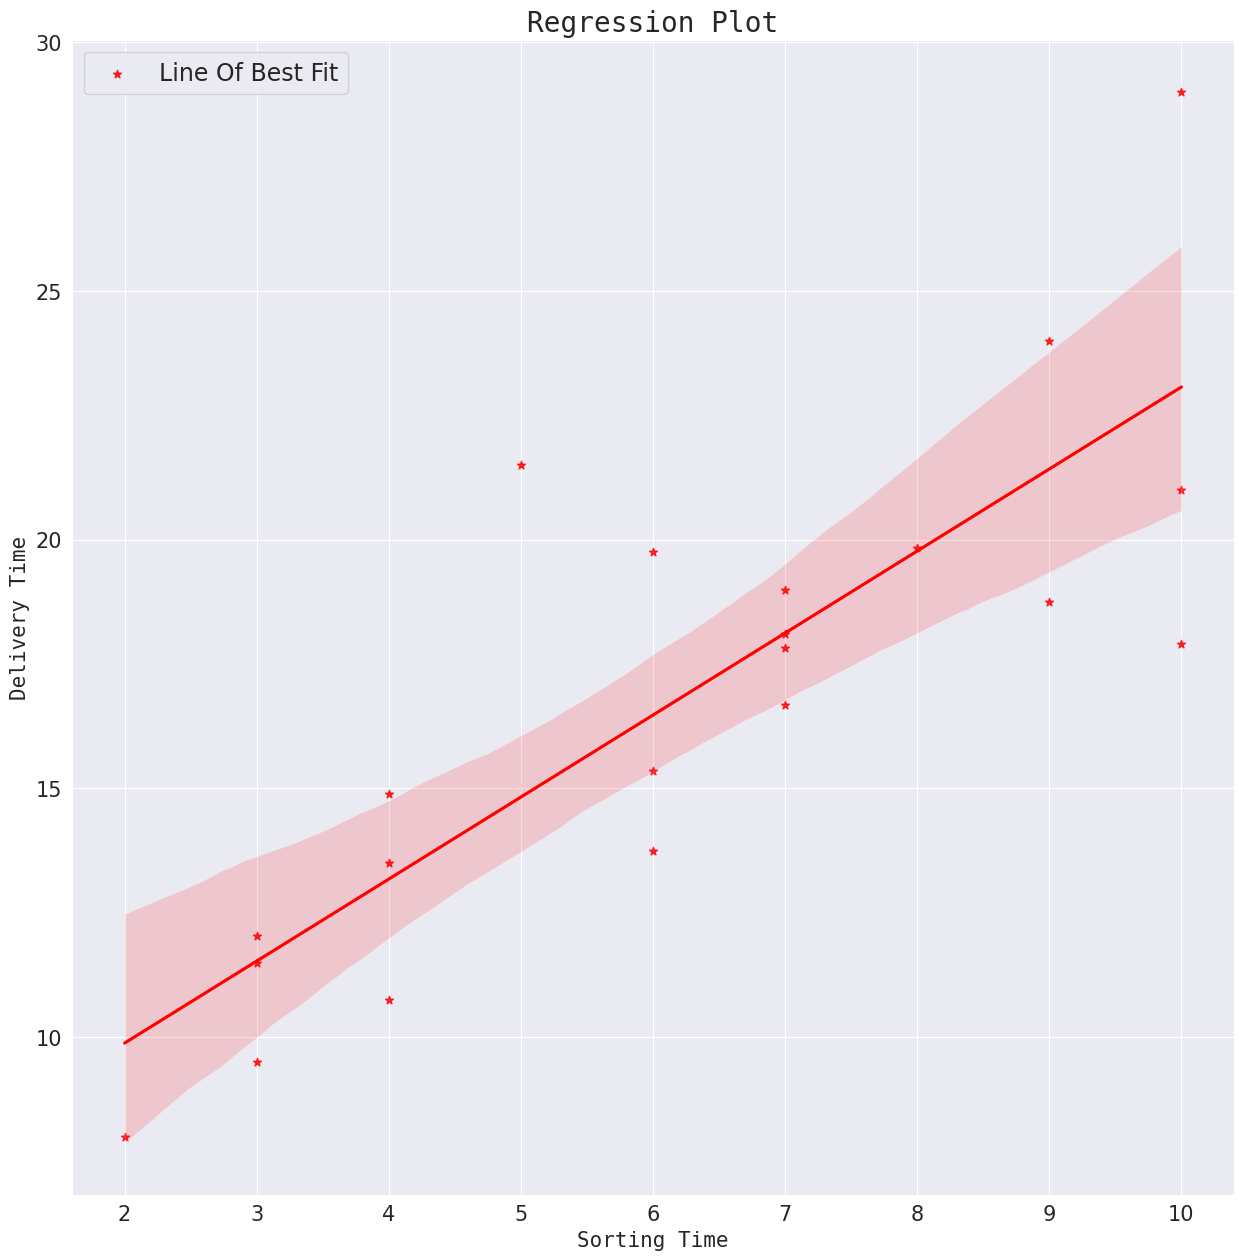

In [31]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
sns.regplot(x='ST',y='DT',data=data,color='red',marker='*')
plt.xlabel('Sorting Time',size=15,family='monospace')
plt.ylabel('Delivery Time',size=15,family='monospace')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Regression Plot',size=20,family='monospace')
plt.legend(['Line Of Best Fit'],loc='upper left',fontsize=17)
plt.show()

In [32]:
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [33]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# **Applying Logarithmic Transformation**

In [35]:
import numpy as np

In [36]:
data['ST_log']=np.log(data['ST'])

In [37]:
data.head()

,DT,ST,ST_log
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [38]:
model=sfa.ols('DT~ST_log',data=data).fit()

In [39]:
model

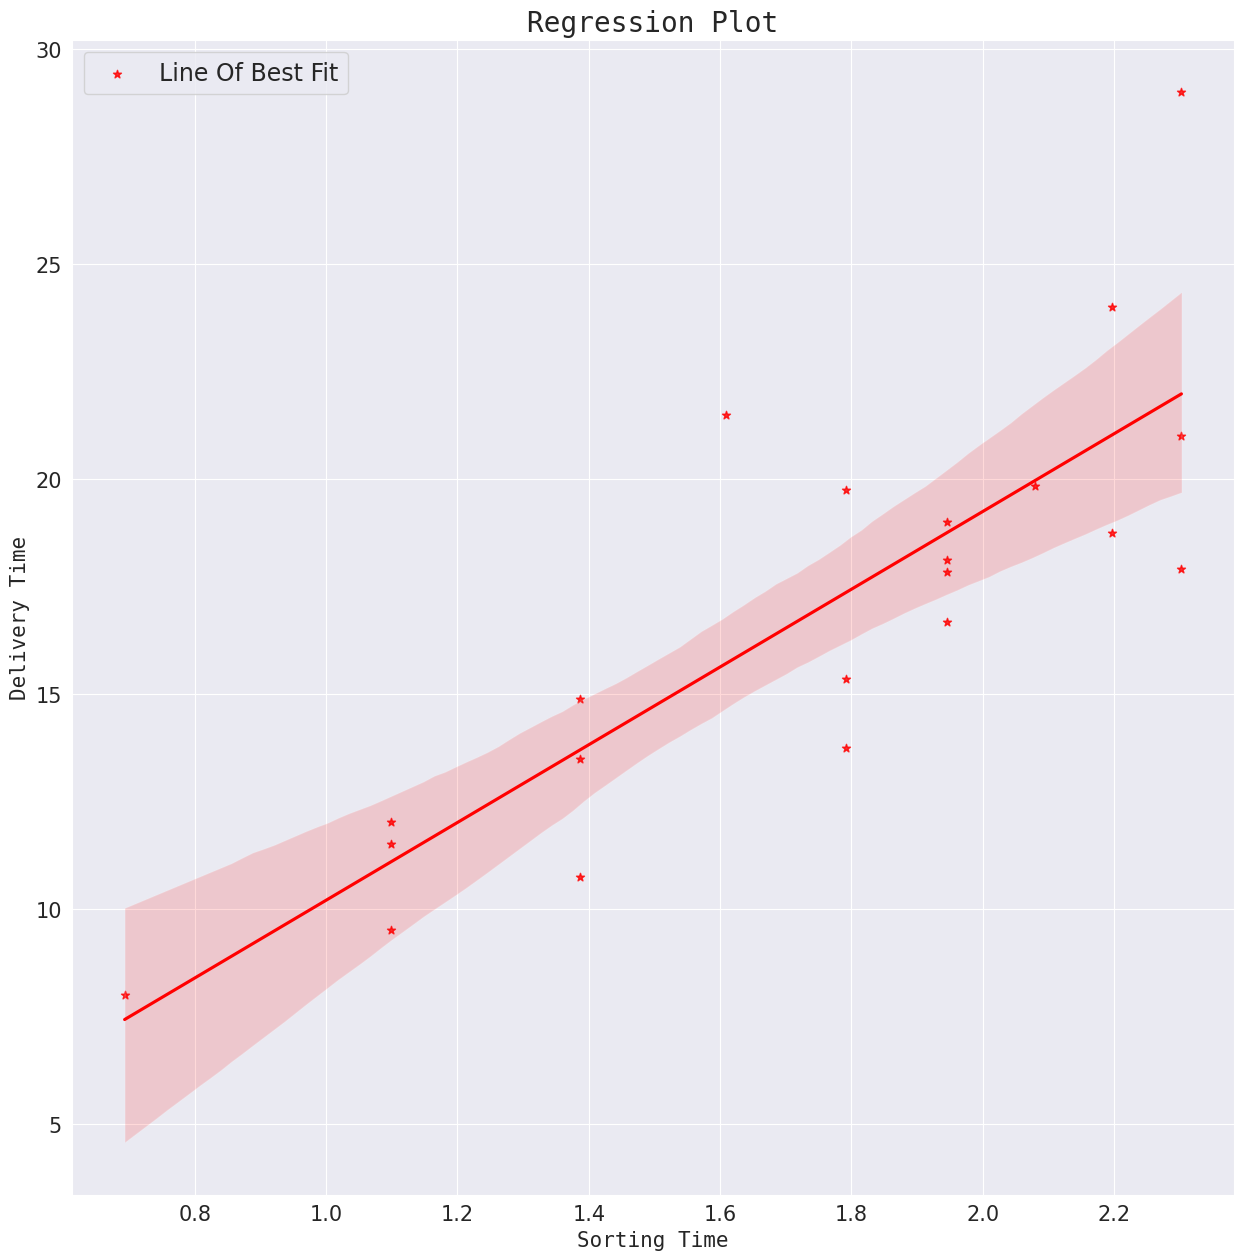

In [40]:
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
sns.regplot(x='ST_log',y='DT',data=data,color='red',marker='*')
plt.xlabel('Sorting Time',size=15,family='monospace')
plt.ylabel('Delivery Time',size=15,family='monospace')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Regression Plot',size=20,family='monospace')
plt.legend(['Line Of Best Fit'],loc='upper left',fontsize=17)
plt.show()

In [41]:
model.rsquared

0.6954434611324223